In [1]:
from mpasanalysis import *
%matplotlib inline

In [2]:
# flags
save_fig = True

In [3]:
# load data
obsname = 'OBS'
casename0 = 'GMPAS-IAF_T62_oEC60to30v3_CTRL'
casename1 = 'GMPAS-IAF_T62_oEC60to30v3_TWAV'
casename2 = 'GMPAS-IAF_T62_oEC60to30v3_LF17'
dataroot = os.environ['HOME']+'/work/mpas/LT_in_E3SM/data'
figroot = os.environ['HOME']+'/work/mpas/LT_in_E3SM/figures'
varname = 'temperatureArgo_oEC60to30v3_to_0.5x0.5degree'
fileobs_ann = 'thetaArgo_1.0x1.0degree_to_0.5x0.5degree_ANN.nc'
file_ann = 'mpaso_ANN_004301_006212_climo.nc'
ncdataobs_ann = dataroot + '/' + obsname + '/' + fileobs_ann
ncdata0_ann = dataroot + '/' + casename0 + '/' + varname + '/' + file_ann
ncdata1_ann = dataroot + '/' + casename1 + '/' + varname + '/' + file_ann
ncdata2_ann = dataroot + '/' + casename2 + '/' + varname + '/' + file_ann
dsobs_ann = Dataset(ncdataobs_ann, 'r')
ds0_ann = Dataset(ncdata0_ann, 'r')
ds1_ann = Dataset(ncdata1_ann, 'r')
ds2_ann = Dataset(ncdata2_ann, 'r')

In [4]:
# processing data
lat = dsobs_ann.variables['latCoord'][:]
lon = dsobs_ann.variables['lonCoord'][:]
xx, yy = np.meshgrid(lon, lat)
wgt = dsobs_ann.variables['area'][:]
depth = dsobs_ann.variables['DEPTH'][:]

datobs_ann = dsobs_ann.variables['theta'][:]
dat0_ann = ds0_ann.variables['timeMonthly_avg_activeTracers_temperature'][:]
dat1_ann = ds1_ann.variables['timeMonthly_avg_activeTracers_temperature'][:]
dat2_ann = ds2_ann.variables['timeMonthly_avg_activeTracers_temperature'][:]
nslice = datobs_ann.shape[0]

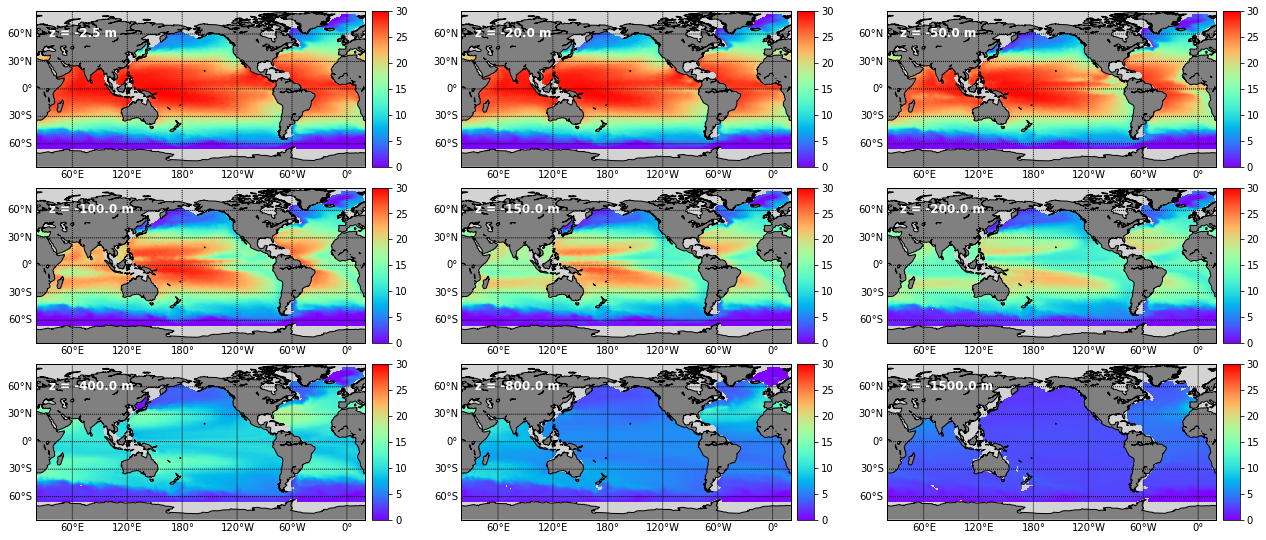

In [5]:
# annual mean temperature from Argo
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, datobs_ann[i,:,:], axis=axarr[m,n], vmin=0, vmax=30)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_obs.png'
    plt.savefig(figname, dpi = 300)

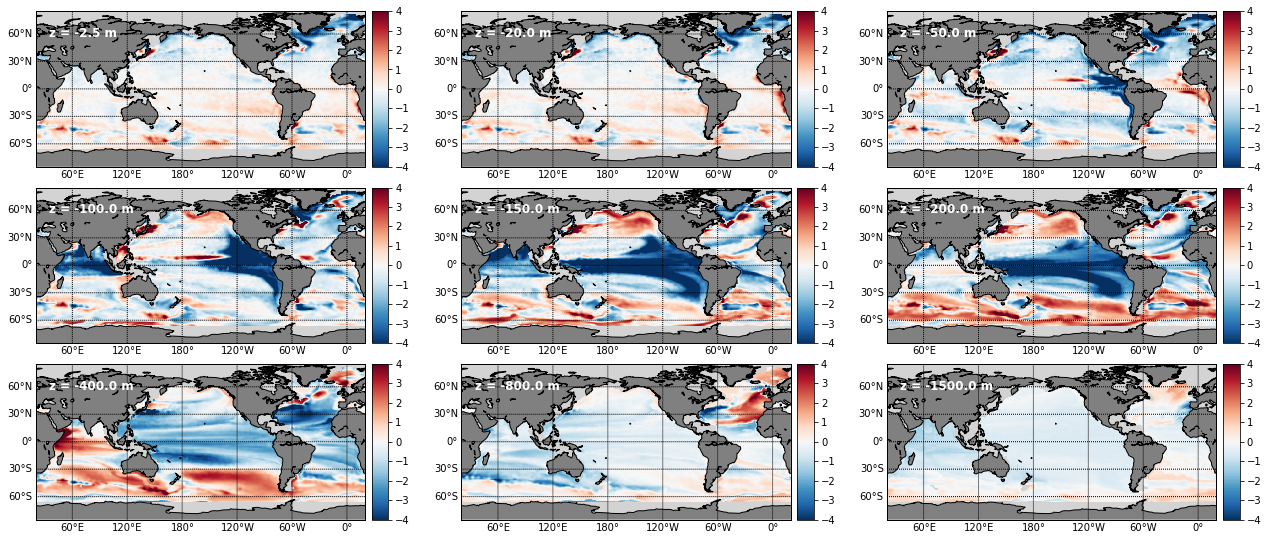

In [6]:
# annual mean temperature bias, control 
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, dat0_ann[:,:,i]-datobs_ann[i,:,:], axis=axarr[m,n], cmap='RdBu_r', vmin=-4, vmax=4)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_bias_'+casename0+'.png'
    plt.savefig(figname, dpi = 300)

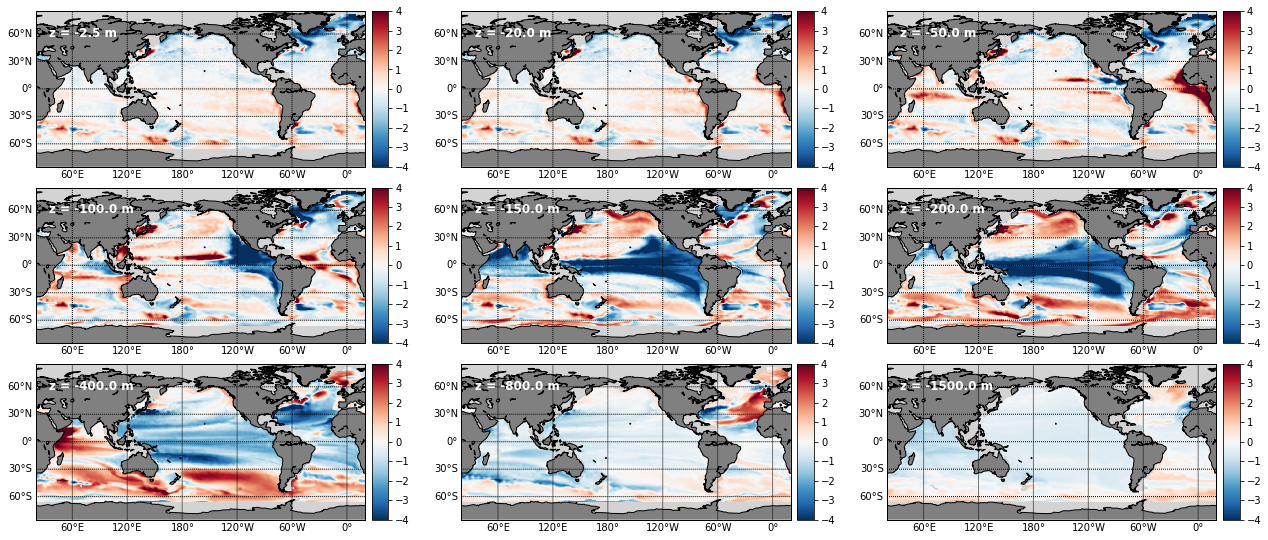

In [7]:
# annual mean temperature bias, LT-VR12
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, dat1_ann[:,:,i]-datobs_ann[i,:,:], axis=axarr[m,n], cmap='RdBu_r', vmin=-4, vmax=4)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_bias_'+casename1+'.png'
    plt.savefig(figname, dpi = 300)

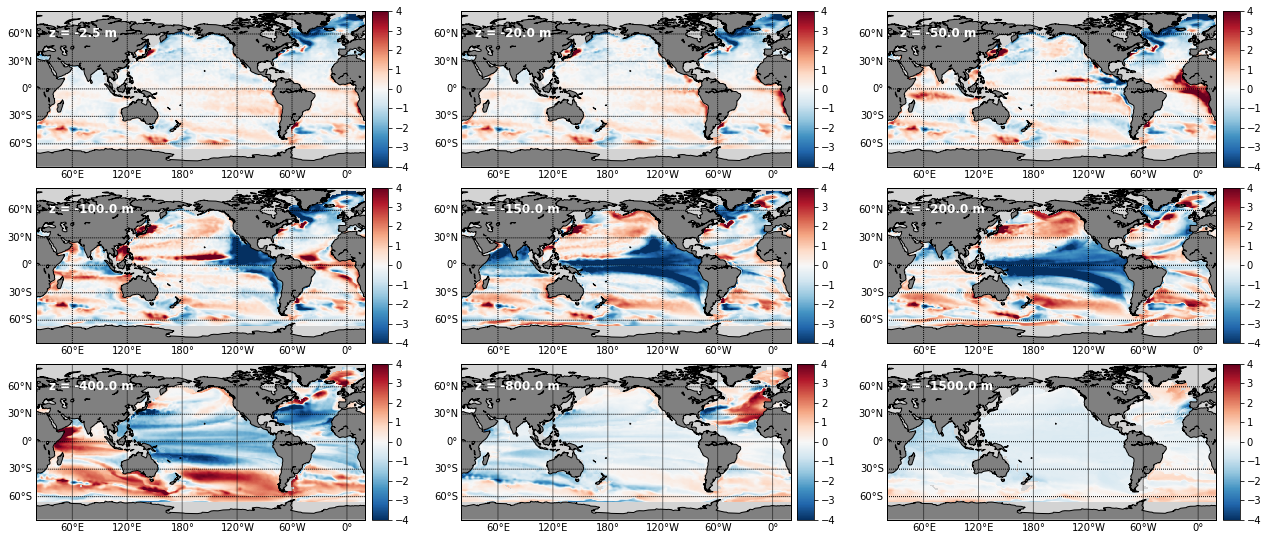

In [8]:
# annual mean temperature bias, LT-LF17
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, dat2_ann[:,:,i]-datobs_ann[i,:,:], axis=axarr[m,n], cmap='RdBu_r', vmin=-4, vmax=4)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_bias_'+casename2+'.png'
    plt.savefig(figname, dpi = 300)

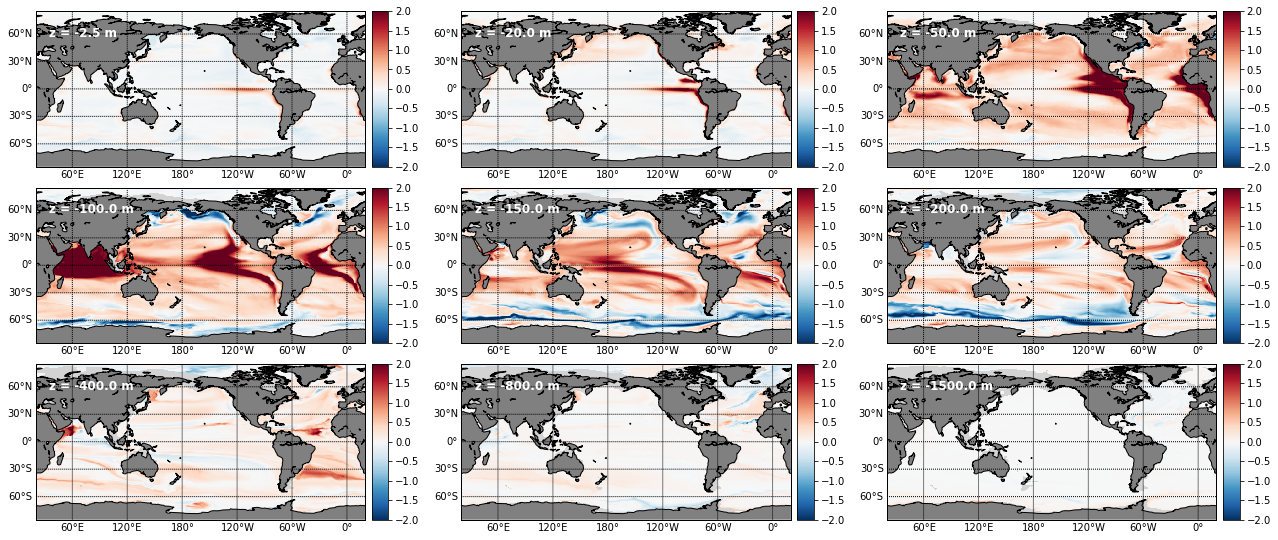

In [9]:
# annual mean temperature change, LT-VR12 - control 
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, dat1_ann[:,:,i]-dat0_ann[:,:,i], axis=axarr[m,n], cmap='RdBu_r', vmin=-2, vmax=2)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_diff_'+casename1+'-'+casename0+'.png'
    plt.savefig(figname, dpi = 300)

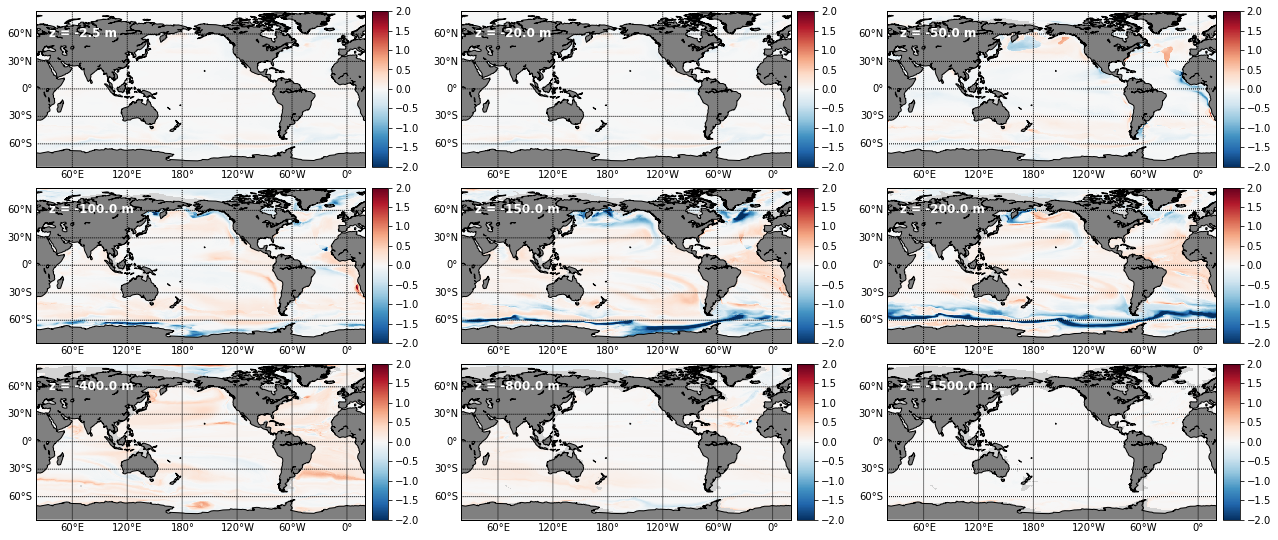

In [10]:
# annual mean temperature change, LT-LF17 - LT-VR12
f, axarr = plt.subplots(3, 3)
f.set_size_inches(18, 7.5)
for i in np.arange(nslice):
    m, n = np.divmod(i, 3)
    fig = plot_map(xx, yy, dat2_ann[:,:,i]-dat1_ann[:,:,i], axis=axarr[m,n], cmap='RdBu_r', vmin=-2, vmax=2)
    sflabel = 'z = {} m'.format(depth[i])
    axarr[m, n].text(0.04, 0.9, sflabel, transform=axarr[m, n].transAxes, 
                     fontsize=12, color='white', fontweight='bold', va='top')
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_diff_'+casename2+'-'+casename1+'.png'
    plt.savefig(figname, dpi = 300)

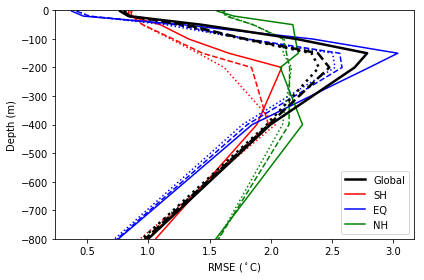

In [11]:
# rmse profile
rmse0_arr = np.zeros([nslice,4])
rmse1_arr = np.zeros([nslice,4])
rmse2_arr = np.zeros([nslice,4])
for i in np.arange(nslice):
    rmse0_arr[i,:] = rmse_lat(datobs_ann[i,:,:], dat0_ann[:,:,i], lat, [-30, 30], wgt=wgt)
    rmse1_arr[i,:] = rmse_lat(datobs_ann[i,:,:], dat1_ann[:,:,i], lat, [-30, 30], wgt=wgt)
    rmse2_arr[i,:] = rmse_lat(datobs_ann[i,:,:], dat2_ann[:,:,i], lat, [-30, 30], wgt=wgt)

# plot figure
plt.figure(figsize=(6, 4))
p10, = plt.plot(rmse0_arr[:,1], depth, '-r', linewidth=1.5)
p11, = plt.plot(rmse1_arr[:,1], depth, '--r', linewidth=1.5)
p12, = plt.plot(rmse2_arr[:,1], depth, ':r', linewidth=1.5)
p20, = plt.plot(rmse0_arr[:,2], depth, '-b', linewidth=1.5)
p21, = plt.plot(rmse1_arr[:,2], depth, '--b', linewidth=1.5)
p22, = plt.plot(rmse2_arr[:,2], depth, ':b', linewidth=1.5)
p30, = plt.plot(rmse0_arr[:,3], depth, '-g', linewidth=1.5)
p31, = plt.plot(rmse1_arr[:,3], depth, '--g', linewidth=1.5)
p32, = plt.plot(rmse2_arr[:,3], depth, ':g', linewidth=1.5)
p00, = plt.plot(rmse0_arr[:,0], depth, '-k', linewidth=2.5)
p01, = plt.plot(rmse1_arr[:,0], depth, '--k', linewidth=2.5)
p02, = plt.plot(rmse2_arr[:,0], depth, ':k', linewidth=2.5)
plt.xlabel('RMSE ($^\circ$C)')
plt.ylabel('Depth (m)')
plt.ylim([-800, 0])
plt.legend((p00, p10, p20, p30), ('Global', 'SH', 'EQ', 'NH'))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_rmse_profile.png'
    plt.savefig(figname, dpi = 300)

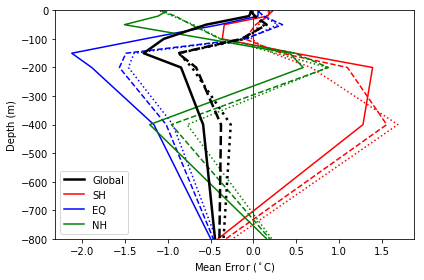

In [12]:
# mean bias profile
me0_arr = np.zeros([nslice,4])
me1_arr = np.zeros([nslice,4])
me2_arr = np.zeros([nslice,4])
for i in np.arange(nslice):
    me0_arr[i,:] = me_lat(datobs_ann[i,:,:], dat0_ann[:,:,i], lat, [-30, 30], wgt=wgt)
    me1_arr[i,:] = me_lat(datobs_ann[i,:,:], dat1_ann[:,:,i], lat, [-30, 30], wgt=wgt)
    me2_arr[i,:] = me_lat(datobs_ann[i,:,:], dat2_ann[:,:,i], lat, [-30, 30], wgt=wgt)

# plot figure
plt.figure(figsize=(6, 4))
plt.vlines(0, ymin=-800, ymax=0, linewidth=0.75)
p10, = plt.plot(me0_arr[:,1], depth, '-r', linewidth=1.5)
p11, = plt.plot(me1_arr[:,1], depth, '--r', linewidth=1.5)
p12, = plt.plot(me2_arr[:,1], depth, ':r', linewidth=1.5)
p20, = plt.plot(me0_arr[:,2], depth, '-b', linewidth=1.5)
p21, = plt.plot(me1_arr[:,2], depth, '--b', linewidth=1.5)
p22, = plt.plot(me2_arr[:,2], depth, ':b', linewidth=1.5)
p30, = plt.plot(me0_arr[:,3], depth, '-g', linewidth=1.5)
p31, = plt.plot(me1_arr[:,3], depth, '--g', linewidth=1.5)
p32, = plt.plot(me2_arr[:,3], depth, ':g', linewidth=1.5)
p00, = plt.plot(me0_arr[:,0], depth, '-k', linewidth=2.5)
p01, = plt.plot(me1_arr[:,0], depth, '--k', linewidth=2.5)
p02, = plt.plot(me2_arr[:,0], depth, ':k', linewidth=2.5)
plt.xlabel('Mean Error ($^\circ$C)')
plt.ylabel('Depth (m)')
plt.ylim([-800, 0])
plt.legend((p00, p10, p20, p30), ('Global', 'SH', 'EQ', 'NH'))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/thetaArgo_me_profile.png'
    plt.savefig(figname, dpi = 300)